In [26]:
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data from CSV file
df = pd.read_csv('dataset.csv')
# df['type'] = '__label__' + df['type'].astype(str)

# Split data into train, test, and dev sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, dev = train_test_split(train, test_size=0.1, random_state=42)

# Write data to CSV files
train.to_csv('flair_data/train.csv', index=False)
test.to_csv('flair_data/test.csv', index=False)
dev.to_csv('flair_data/dev.csv', index=False)

# Use your own path here
data_folder = './flair_data'

# column format indicating which columns hold the text and label(s)
column_name_map = {0: "label", 1: "text"}

# what label do we want to predict?
label_type = 'type'

# Load corpus containing training, test and dev data
corpus: Corpus = CSVClassificationCorpus(data_folder, column_name_map, label_type=label_type, skip_header=True, train_file='train.csv', test_file='test.csv', dev_file='dev.csv')

2024-02-24 18:16:32,122 Reading data from flair_data
2024-02-24 18:16:32,123 Train: flair_data/train.csv
2024-02-24 18:16:32,123 Dev: flair_data/dev.csv
2024-02-24 18:16:32,124 Test: flair_data/test.csv


In [32]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer


# create the label dictionary
label_dict = corpus.make_label_dictionary(label_type=label_type)

# initialize transformer document embeddings (many models are available)
document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)

# create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, label_type=label_type)

# initialize trainer
trainer = ModelTrainer(classifier, corpus)

# run training with fine-tuning
trainer.fine_tune('models',
                  learning_rate=5.0e-5,
                  mini_batch_size=4,
                  max_epochs=10,
                  )


2024-02-24 18:17:17,270 Computing label dictionary. Progress:


0it [00:00, ?it/s]
6246it [01:31, 68.18it/s]

2024-02-24 18:18:48,900 Dictionary created for label 'type' with 16 values: INFP (seen 1308 times), INFJ (seen 1058 times), INTP (seen 915 times), INTJ (seen 804 times), ENFP (seen 498 times), ENTP (seen 491 times), ISTP (seen 246 times), ISFP (seen 198 times), ENTJ (seen 173 times), ISTJ (seen 147 times), ENFJ (seen 138 times), ISFJ (seen 111 times), ESTP (seen 64 times), ESFP (seen 38 times), ESFJ (seen 30 times), ESTJ (seen 27 times)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

2024-02-24 18:19:36,093 ----------------------------------------------------------------------------------------------------
2024-02-24 18:19:36,094 Model: "TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30523, 768)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0-5): 6 x TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out

100%|██████████| 44/44 [00:28<00:00,  1.56it/s]

2024-02-24 18:24:20,855 DEV : loss 1.5832395553588867 - f1-score (micro avg)  0.5418


2024-02-24 18:24:39,980 ----------------------------------------------------------------------------------------------------
2024-02-24 18:25:06,263 epoch 2 - iter 156/1562 - loss 1.63355728 - time (sec): 26.28 - samples/sec: 23.74 - lr: 0.000049 - momentum: 0.000000
2024-02-24 18:25:32,690 epoch 2 - iter 312/1562 - loss 1.59066052 - time (sec): 52.71 - samples/sec: 23.68 - lr: 0.000049 - momentum: 0.000000
2024-02-24 18:26:01,211 epoch 2 - iter 468/1562 - loss 1.56078927 - time (sec): 81.23 - samples/sec: 23.05 - lr: 0.000048 - momentum: 0.000000
2024-02-24 18:26:30,716 epoch 2 - iter 624/1562 - loss 1.54341618 - time (sec): 110.73 - samples/sec: 22.54 - lr: 0.000048 - momentum: 0.000000
2024-02-24 18:26:59,651 epoch 2 - iter 780/1562 - loss 1.52971215 - time (sec): 139.67 - samples/sec: 22.34 - lr: 0.000047 - momentum: 0.000000
2024-02-24 18:27:28,866 epoch 2 - iter 936/1562 - loss 1.51524799 - time (sec): 168.88 - samples/sec: 22.17 - lr: 0.000047 - momentum: 0.000000
2024-02-24 18:

100%|██████████| 44/44 [00:28<00:00,  1.56it/s]

2024-02-24 18:29:52,586 DEV : loss 1.5166486501693726 - f1-score (micro avg)  0.5591


2024-02-24 18:30:06,719 ----------------------------------------------------------------------------------------------------
2024-02-24 18:30:33,140 epoch 3 - iter 156/1562 - loss 1.24978475 - time (sec): 26.42 - samples/sec: 23.62 - lr: 0.000044 - momentum: 0.000000
2024-02-24 18:31:00,103 epoch 3 - iter 312/1562 - loss 1.25215935 - time (sec): 53.38 - samples/sec: 23.38 - lr: 0.000043 - momentum: 0.000000
2024-02-24 18:31:27,837 epoch 3 - iter 468/1562 - loss 1.22820796 - time (sec): 81.12 - samples/sec: 23.08 - lr: 0.000043 - momentum: 0.000000
2024-02-24 18:31:58,810 epoch 3 - iter 624/1562 - loss 1.20873397 - time (sec): 112.09 - samples/sec: 22.27 - lr: 0.000042 - momentum: 0.000000
2024-02-24 18:32:27,543 epoch 3 - iter 780/1562 - loss 1.19533881 - time (sec): 140.82 - samples/sec: 22.16 - lr: 0.000042 - momentum: 0.000000
2024-02-24 18:32:56,542 epoch 3 - iter 936/1562 - loss 1.20442060 - time (sec): 169.82 - samples/sec: 22.05 - lr: 0.000041 - momentum: 0.000000
2024-02-24 18:

100%|██████████| 44/44 [00:28<00:00,  1.56it/s]

2024-02-24 18:35:24,025 DEV : loss 1.5787001848220825 - f1-score (micro avg)  0.585


2024-02-24 18:35:38,111 ----------------------------------------------------------------------------------------------------
2024-02-24 18:36:04,377 epoch 4 - iter 156/1562 - loss 0.76832876 - time (sec): 26.26 - samples/sec: 23.76 - lr: 0.000038 - momentum: 0.000000
2024-02-24 18:36:31,766 epoch 4 - iter 312/1562 - loss 0.79586978 - time (sec): 53.65 - samples/sec: 23.26 - lr: 0.000038 - momentum: 0.000000
2024-02-24 18:37:00,153 epoch 4 - iter 468/1562 - loss 0.82844341 - time (sec): 82.04 - samples/sec: 22.82 - lr: 0.000037 - momentum: 0.000000
2024-02-24 18:37:29,467 epoch 4 - iter 624/1562 - loss 0.84711667 - time (sec): 111.35 - samples/sec: 22.41 - lr: 0.000037 - momentum: 0.000000
2024-02-24 18:37:58,606 epoch 4 - iter 780/1562 - loss 0.85424398 - time (sec): 140.49 - samples/sec: 22.21 - lr: 0.000036 - momentum: 0.000000
2024-02-24 18:38:27,451 epoch 4 - iter 936/1562 - loss 0.86304352 - time (sec): 169.34 - samples/sec: 22.11 - lr: 0.000036 - momentum: 0.000000
2024-02-24 18:

100%|██████████| 44/44 [00:28<00:00,  1.56it/s]

2024-02-24 18:40:52,608 DEV : loss 1.9956300258636475 - f1-score (micro avg)  0.5778


2024-02-24 18:41:06,615 ----------------------------------------------------------------------------------------------------
2024-02-24 18:41:33,050 epoch 5 - iter 156/1562 - loss 0.51747296 - time (sec): 26.43 - samples/sec: 23.61 - lr: 0.000033 - momentum: 0.000000
2024-02-24 18:42:00,019 epoch 5 - iter 312/1562 - loss 0.48718638 - time (sec): 53.40 - samples/sec: 23.37 - lr: 0.000032 - momentum: 0.000000
2024-02-24 18:42:28,561 epoch 5 - iter 468/1562 - loss 0.52198384 - time (sec): 81.94 - samples/sec: 22.84 - lr: 0.000032 - momentum: 0.000000
2024-02-24 18:42:57,140 epoch 5 - iter 624/1562 - loss 0.54365855 - time (sec): 110.52 - samples/sec: 22.58 - lr: 0.000031 - momentum: 0.000000
2024-02-24 18:43:25,981 epoch 5 - iter 780/1562 - loss 0.56002617 - time (sec): 139.36 - samples/sec: 22.39 - lr: 0.000031 - momentum: 0.000000
2024-02-24 18:43:55,189 epoch 5 - iter 936/1562 - loss 0.55965801 - time (sec): 168.57 - samples/sec: 22.21 - lr: 0.000030 - momentum: 0.000000
2024-02-24 18:

100%|██████████| 44/44 [00:29<00:00,  1.48it/s]

2024-02-24 18:46:23,068 DEV : loss 2.3920891284942627 - f1-score (micro avg)  0.5677


2024-02-24 18:46:35,298 ----------------------------------------------------------------------------------------------------
2024-02-24 18:47:01,991 epoch 6 - iter 156/1562 - loss 0.28336037 - time (sec): 26.69 - samples/sec: 23.38 - lr: 0.000027 - momentum: 0.000000
2024-02-24 18:47:29,222 epoch 6 - iter 312/1562 - loss 0.31289778 - time (sec): 53.92 - samples/sec: 23.14 - lr: 0.000027 - momentum: 0.000000
2024-02-24 18:47:57,680 epoch 6 - iter 468/1562 - loss 0.35135069 - time (sec): 82.38 - samples/sec: 22.72 - lr: 0.000026 - momentum: 0.000000
2024-02-24 18:48:27,483 epoch 6 - iter 624/1562 - loss 0.34739991 - time (sec): 112.18 - samples/sec: 22.25 - lr: 0.000026 - momentum: 0.000000
2024-02-24 18:48:56,255 epoch 6 - iter 780/1562 - loss 0.32823065 - time (sec): 140.96 - samples/sec: 22.13 - lr: 0.000025 - momentum: 0.000000
2024-02-24 18:49:25,318 epoch 6 - iter 936/1562 - loss 0.32743323 - time (sec): 170.02 - samples/sec: 22.02 - lr: 0.000024 - momentum: 0.000000
2024-02-24 18:

100%|██████████| 44/44 [00:28<00:00,  1.55it/s]

2024-02-24 18:51:51,393 DEV : loss 3.3177449703216553 - f1-score (micro avg)  0.5504


2024-02-24 18:52:04,865 ----------------------------------------------------------------------------------------------------
2024-02-24 18:52:31,316 epoch 7 - iter 156/1562 - loss 0.17530130 - time (sec): 26.45 - samples/sec: 23.59 - lr: 0.000022 - momentum: 0.000000
2024-02-24 18:52:58,544 epoch 7 - iter 312/1562 - loss 0.16805702 - time (sec): 53.68 - samples/sec: 23.25 - lr: 0.000021 - momentum: 0.000000
2024-02-24 18:53:26,941 epoch 7 - iter 468/1562 - loss 0.19278311 - time (sec): 82.07 - samples/sec: 22.81 - lr: 0.000021 - momentum: 0.000000
2024-02-24 18:53:55,133 epoch 7 - iter 624/1562 - loss 0.18378494 - time (sec): 110.27 - samples/sec: 22.64 - lr: 0.000020 - momentum: 0.000000
2024-02-24 18:54:23,738 epoch 7 - iter 780/1562 - loss 0.18857161 - time (sec): 138.87 - samples/sec: 22.47 - lr: 0.000019 - momentum: 0.000000
2024-02-24 18:54:52,515 epoch 7 - iter 936/1562 - loss 0.18392099 - time (sec): 167.65 - samples/sec: 22.33 - lr: 0.000019 - momentum: 0.000000
2024-02-24 18:

100%|██████████| 44/44 [00:28<00:00,  1.53it/s]

2024-02-24 18:57:18,289 DEV : loss 3.8546335697174072 - f1-score (micro avg)  0.5548


2024-02-24 18:57:30,663 ----------------------------------------------------------------------------------------------------
2024-02-24 18:57:57,649 epoch 8 - iter 156/1562 - loss 0.06854232 - time (sec): 26.98 - samples/sec: 23.12 - lr: 0.000016 - momentum: 0.000000
2024-02-24 18:58:25,098 epoch 8 - iter 312/1562 - loss 0.07559528 - time (sec): 54.43 - samples/sec: 22.93 - lr: 0.000016 - momentum: 0.000000
2024-02-24 18:58:53,735 epoch 8 - iter 468/1562 - loss 0.06748397 - time (sec): 83.07 - samples/sec: 22.54 - lr: 0.000015 - momentum: 0.000000
2024-02-24 18:59:22,902 epoch 8 - iter 624/1562 - loss 0.07352181 - time (sec): 112.24 - samples/sec: 22.24 - lr: 0.000014 - momentum: 0.000000
2024-02-24 18:59:52,289 epoch 8 - iter 780/1562 - loss 0.07933832 - time (sec): 141.62 - samples/sec: 22.03 - lr: 0.000014 - momentum: 0.000000
2024-02-24 19:00:22,032 epoch 8 - iter 936/1562 - loss 0.07861745 - time (sec): 171.37 - samples/sec: 21.85 - lr: 0.000013 - momentum: 0.000000
2024-02-24 19:

100%|██████████| 44/44 [00:27<00:00,  1.58it/s]

2024-02-24 19:02:48,233 DEV : loss 3.853803873062134 - f1-score (micro avg)  0.5591


2024-02-24 19:03:01,413 ----------------------------------------------------------------------------------------------------
2024-02-24 19:03:28,354 epoch 9 - iter 156/1562 - loss 0.03950196 - time (sec): 26.94 - samples/sec: 23.16 - lr: 0.000011 - momentum: 0.000000
2024-02-24 19:03:55,383 epoch 9 - iter 312/1562 - loss 0.03580087 - time (sec): 53.97 - samples/sec: 23.12 - lr: 0.000010 - momentum: 0.000000
2024-02-24 19:04:23,946 epoch 9 - iter 468/1562 - loss 0.03560132 - time (sec): 82.53 - samples/sec: 22.68 - lr: 0.000009 - momentum: 0.000000
2024-02-24 19:04:52,833 epoch 9 - iter 624/1562 - loss 0.02877073 - time (sec): 111.42 - samples/sec: 22.40 - lr: 0.000009 - momentum: 0.000000
2024-02-24 19:05:22,437 epoch 9 - iter 780/1562 - loss 0.02500218 - time (sec): 141.02 - samples/sec: 22.12 - lr: 0.000008 - momentum: 0.000000
2024-02-24 19:05:51,544 epoch 9 - iter 936/1562 - loss 0.02287758 - time (sec): 170.13 - samples/sec: 22.01 - lr: 0.000008 - momentum: 0.000000
2024-02-24 19:

100%|██████████| 44/44 [00:29<00:00,  1.49it/s]

2024-02-24 19:08:19,529 DEV : loss 3.9515633583068848 - f1-score (micro avg)  0.5778


2024-02-24 19:08:32,615 ----------------------------------------------------------------------------------------------------
2024-02-24 19:08:59,011 epoch 10 - iter 156/1562 - loss 0.00972751 - time (sec): 26.39 - samples/sec: 23.64 - lr: 0.000005 - momentum: 0.000000
2024-02-24 19:09:26,122 epoch 10 - iter 312/1562 - loss 0.01394965 - time (sec): 53.51 - samples/sec: 23.32 - lr: 0.000004 - momentum: 0.000000
2024-02-24 19:09:55,033 epoch 10 - iter 468/1562 - loss 0.01484381 - time (sec): 82.42 - samples/sec: 22.71 - lr: 0.000004 - momentum: 0.000000
2024-02-24 19:10:23,892 epoch 10 - iter 624/1562 - loss 0.01227328 - time (sec): 111.28 - samples/sec: 22.43 - lr: 0.000003 - momentum: 0.000000
2024-02-24 19:10:52,710 epoch 10 - iter 780/1562 - loss 0.01219938 - time (sec): 140.09 - samples/sec: 22.27 - lr: 0.000003 - momentum: 0.000000
2024-02-24 19:11:22,269 epoch 10 - iter 936/1562 - loss 0.01039881 - time (sec): 169.65 - samples/sec: 22.07 - lr: 0.000002 - momentum: 0.000000
2024-02-

100%|██████████| 44/44 [00:28<00:00,  1.55it/s]

2024-02-24 19:13:50,129 DEV : loss 4.07877779006958 - f1-score (micro avg)  0.572


2024-02-24 19:14:04,462 ----------------------------------------------------------------------------------------------------
2024-02-24 19:14:04,464 Testing using last state of model ...


100%|██████████| 109/109 [01:09<00:00,  1.57it/s]

2024-02-24 19:15:13,861 
Results:
- F-score (micro) 0.5429
- F-score (macro) 0.4705
- Accuracy 0.5429

By class:
              precision    recall  f1-score   support

        INFP     0.6107    0.6189    0.6148       370
        INTP     0.5729    0.5768    0.5748       293
        INFJ     0.5142    0.5035    0.5088       288
        INTJ     0.5572    0.5803    0.5685       193
        ENTP     0.5194    0.4963    0.5076       135
        ENFP     0.5984    0.5840    0.5911       125
        ISTP     0.5000    0.4627    0.4806        67
        ISFP     0.3396    0.3396    0.3396        53
        ISFJ     0.5306    0.5778    0.5532        45
        ENTJ     0.5000    0.5000    0.5000        44
        ENFJ     0.4773    0.5122    0.4941        41
        ISTJ     0.4167    0.3409    0.3750        44
        ESTP     0.3529    0.4000    0.3750        15
        ESFP     0.1000    0.1250    0.1111         8
        ESTJ     0.3750    0.4286    0.4000         7
        ESFJ     0.500

{'test_score': 0.5429394812680115}

### Predict

In [1]:
from flair.data import Sentence
from flair.models import TextClassifier

classifier = TextClassifier.load('resources/taggers/question-classification-with-transformer/final-model.pt')

# create example sentence
sentence = Sentence('Who built the Eiffel Tower?')

# predict class and print
classifier.predict(sentence)

print(sentence.labels)

['Sentence[6]: "Who built the Eiffel Tower?"'/'ENFJ' (0.5111)]


In [2]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

df = pd.read_csv('dataset.csv')
y_test = df['type']

In [3]:
from tqdm import tqdm
x_test = [Sentence(post) for post in tqdm(df["posts"][:8000])]

100%|██████████| 8000/8000 [01:55<00:00, 69.09it/s] 


In [4]:
for s in tqdm(x_test):
    classifier.predict(s)

  0%|          | 0/8000 [00:00<?, ?it/s]

100%|██████████| 8000/8000 [04:07<00:00, 32.31it/s]


In [5]:
y_pred = [s.labels[0].value for s in x_test]

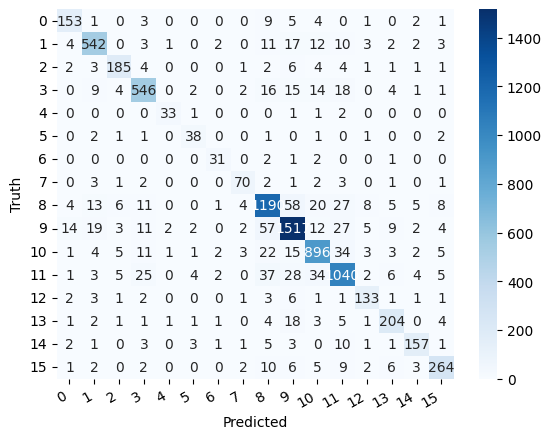

: 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt = "d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation = 30, ha = 'right')
    plt.ylabel('Truth')
    plt.xlabel('Predicted')

cm = confusion_matrix(y_test[:8000], y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)